**Sidratul Tanzila Tasmi
ID: 190041138**

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
def myIDFT(ReX, ImX):
    ReX2 = np.array(ReX)
    ImX2 = np.array(ImX)
    n = len(ReX) * 2
    x = np.zeros(n)

    for k in range(n//2):
        ReX2[k] = ReX2[k]/(n//2)
        ImX2[k] = -ImX2[k]/(n//2)

    ReX2[0] = ReX2[0]/2
    ReX2[-1] = ReX2[-1]/2

    for k in range(n//2):
        for i in range(n-1):
            x[i] = x[i] + ReX2[k] * math.cos(2*math.pi*k*i/n)
            x[i] = x[i] + ImX2[k] * math.sin(2*math.pi*k*i/n)
    return x

#Task 1

Create a random signal x with 256 samples. Then, take an impulse response with 51
samples and a shape similar as shown in the figure.

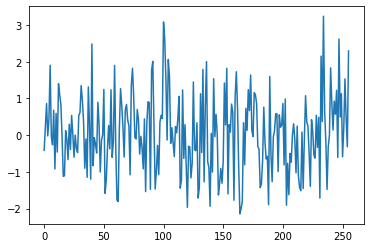

In [ ]:
signal=np.random.normal(0,1,256)
#signal=np.arange(0,0.5,255)*3
plt.plot(signal)
plt.show()

A signal was created upto 256 range

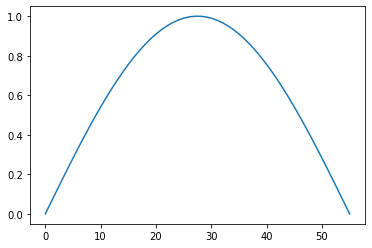

In [ ]:
impulse= np.sin(np.linspace(0, math.pi, 56))
plt.plot(impulse)
plt.show()

The impulse signal was created by plotting the range through linspace library of numpy

(i)

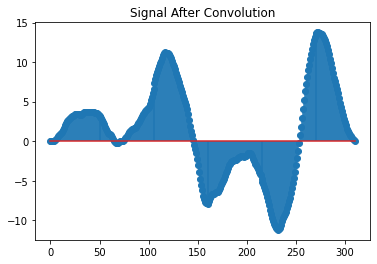

In [ ]:
conv = np.convolve(signal, impulse, 'full')
n = np.arange(0, len(conv), 1)
plt.stem(n, conv, label='Output')
plt.title('Signal After Convolution')
plt.show()

Built in operation was used for convolution

(ii)

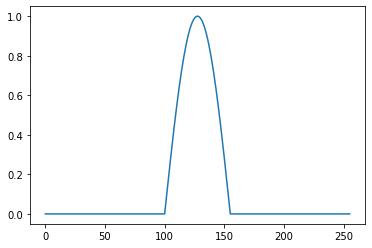

In [ ]:
impulse=np.pad(impulse, 100)
plt.plot(impulse)
plt.show()

Padding was done to match the signal and the impulse response for multiplication

In [ ]:
impulse.shape

(256,)

In [ ]:
signal.shape

(256,)

In [ ]:
spec_analysis = np.fft.rfft(signal)
spec_analysis2 = np.fft.rfft(impulse)
ReX = spec_analysis.real
ImX = -spec_analysis.imag
ReX2 = spec_analysis2.real
ImX2 = -spec_analysis2.imag
convolution2=np.multiply(ReX, ReX)
convolution3=np.multiply(ImX, ImX2)

Using built in convolution function we did the spectral analysis of both signal and impulse, after that we have multipled the corresponding frequency components and multiplied it.

After multiplying the frequency components, if we do reverse convolutions we can see we get back our original signal.

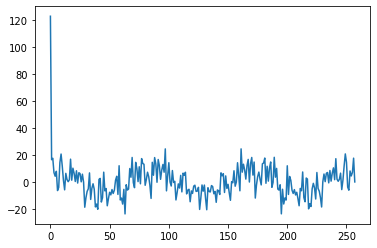

In [ ]:
signal2=myIDFT(convolution2, convolution3)
plt.plot(signal2)

(iii)
<br> There is slight change in the output in the two methods of convolution. This is due to circular convolution. In circular convolution we multiply the frequency components of each signals by padding and making the size of input and impulse signal even. The difference occurs because of the similar periodicity.  circular convolution[2][3] arises from the important special case of constraining the non-zero portions of both
ℎ
h and
�
x to the interval
[
0
,
1
] The circular function can be expressed as:
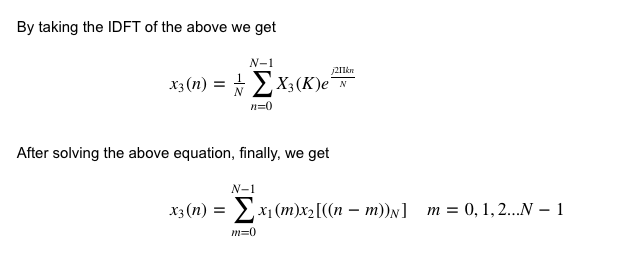


The region where these is difference in output is the spike or impulse created at the zeroth sample. Circular convolution also results in sequence larger than N. This causes overlapping of samples in our signal

(iv)
<br>
To avoid the aliasing of the time domain signal due to circular convolution we can update the sampling frequency and also pass our signal to a low pass filter.
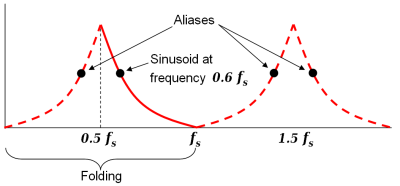

In [ ]:
from scipy.signal import butter, lfilter
from scipy.signal import freqs

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

In [ ]:
freq=np.argmax(np.sqrt(convolution2*convolution2+ convolution3*convolution3))
samplingrate=2*freq

To avoid aliasing nyquest theorem was used.
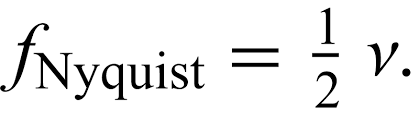

In [ ]:
def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y

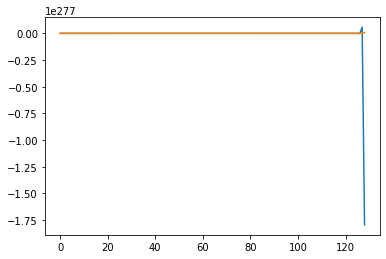

In [ ]:
cutOff = 23.1 #cutoff frequency in rad/s
fs = samplingrate #sampling frequency in rad/s
order = 100 #order of filter
y1 = butter_lowpass_filter(convolution2, cutOff, fs, order)
plt.plot(y1)
y2 = butter_lowpass_filter(convolution3, cutOff, fs, order)
plt.plot(y2)
plt.show()


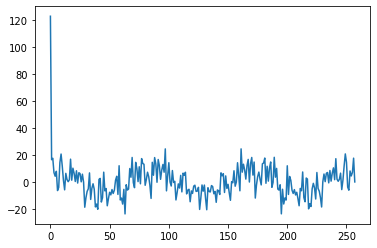

In [ ]:
signal2=myIDFT(convolution2, convolution3)
plt.plot(signal2)

We sampled the frequency with twice the original frequency

To avoid aliasing, we found the frequency of the signal and made the sample rate twice of the actual frequency.

#Task 2

<StemContainer object of 3 artists>

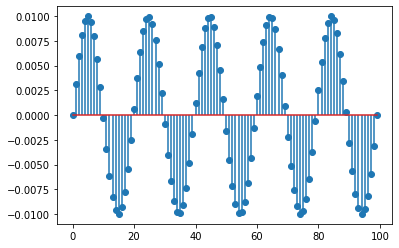

In [ ]:
freq=1
amplitude=0.01
t=np.linspace(0,5,100)
wave=amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave)

We created the signals here according to question

<StemContainer object of 3 artists>

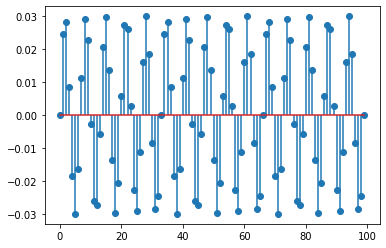

In [ ]:
freq=3
amplitude=0.03
t=np.linspace(0,5,100)
wave2=amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave2)

Then we created another signal with different frequency and amplitude but same range.

In [ ]:
wave3=wave+wave2
t1 = np.fft.rfft(wave)
t2 = np.fft.rfft(wave2)
t3 = np.fft.rfft(wave3)
ReX = t1.real
ImX = -t1.imag
ReX2 = -t2.real
ImX2 = -t2.imag
ReX3 = -t3.real
ImX3 = -t3.imag
ReX4=ReX+ReX2
ImX4= ImX+ImX2

The signals were added. For both signals, sprectum analysis using dft was done as well as for the combined signal. The frequency components of wave 1 and wave 2 are combined and compared with the frequency component of the sprectral analysis of the combined wave.

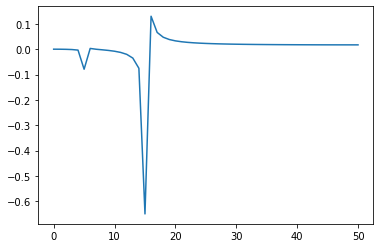

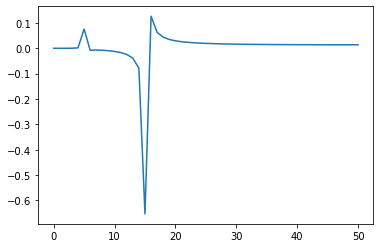

In [ ]:
plt.plot(ReX3)
plt.show()
plt.plot(ReX4)
plt.show()

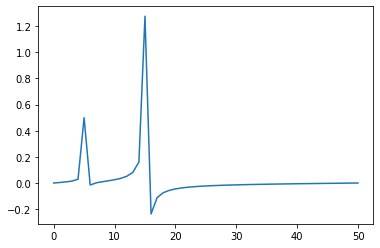

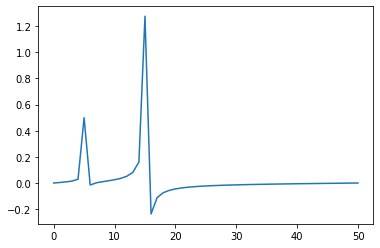

In [ ]:
plt.plot(ImX3)
plt.show()
plt.plot(ImX4)
plt.show()

We can see that the addition of the combined frequency components before comvolution and after convolution gives the same result. This verifies the linear property of our convolution.

#Task 3

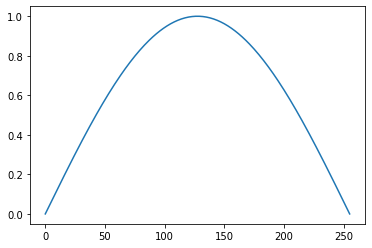

In [ ]:
signal=np.sin(np.linspace(0, math.pi, 256))
plt.plot(signal)
plt.show()

We created a symmetric signal here

In [ ]:
t3 = np.fft.rfft(signal)
R=t3.real
I=t3.imag

After that we did spectral analysis of our created signal

In [ ]:
def React2Polar(ReX,ImX):
  K = len(ReX)
  MagX, PhaseX = np.zeros(K), np.zeros(K)
  for k in range(1, K):
    MagX[k] = math.sqrt(ReX[k] * ReX[k] + ImX[k] * ImX[k])
    PhaseX[k] = math.atan(ImX[k]/ReX[k])

  return PhaseX

This is the function to convert our sprectral signal to polar notation that has been implemented here.
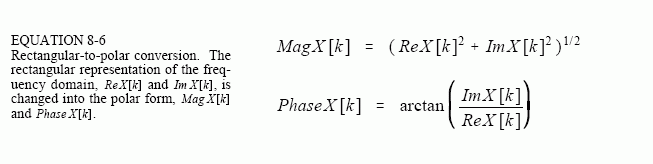

<ipython-input-119-3c28516cbc39>:6: RuntimeWarning: invalid value encountered in double_scalars
  PhaseX[k] = math.atan(ImX[k]/ReX[k])


<StemContainer object of 3 artists>

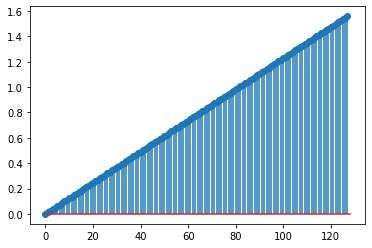

In [ ]:
p=React2Polar(R,I)
plt.stem(p)

We can see that our phase is linear.

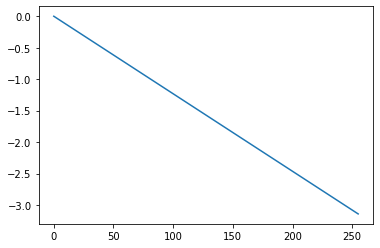

In [ ]:
signal2=np.linspace(0, math.pi, 256)
signal3=np.zeros(len(signal2))
for i in range(len(signal2)):
  signal3[i]+=-1*signal2[i]
plt.plot(signal3)

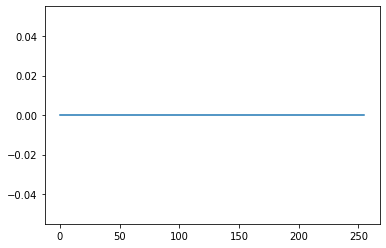

In [ ]:
#shifted=signal2+2*signal3
signal4=np.linspace(0, math.pi, 256)
shifted=signal2-signal4
plt.plot(shifted)

Here we have created a signal that has symmetry around 0, symmetry around the upper and lower portion

<StemContainer object of 3 artists>

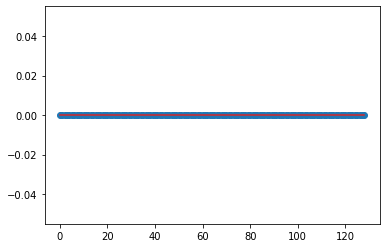

In [ ]:
t3 = np.fft.rfft(shifted)
R=t3.real
I=t3.imag
for i in range(len(I)):
  I[i]+=0.00000000000001
p=np.divide(R,I)
p=np.arctan(p)
plt.stem(p)

We have added a small portion of value to the imaginary components of our signal to avoid divide by zero error. We can see that our phase is zero.

#Task 4

(i)

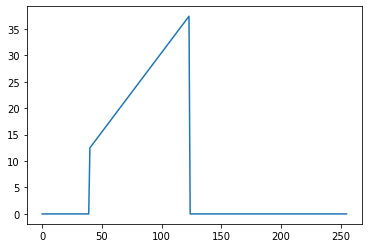

In [ ]:
s=np.zeros(256)
for i in range(40,124):
    s[i]=0.3*i+0.5
plt.plot(s)

At first we created the signal as instructed.

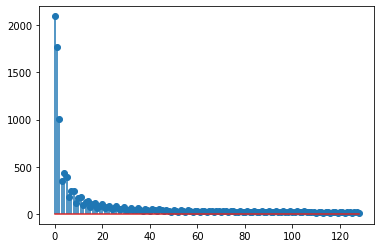

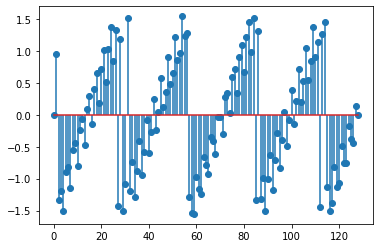

In [ ]:
freq = np.fft.rfft(s)
PhaseX = React2Polar(freq.real, freq.imag)
MgX = np.sqrt(freq.real**2 + freq.imag**2)
plt.stem(MgX)
plt.show()
plt.stem(PhaseX)
plt.show()

(ii)

In the second case we kept the magnitude unchanged but changed the range from 2 Pi to -pi to +pi. After that we performed dft and compored the phase of the signal before and after convolution and checked if the signals remained same

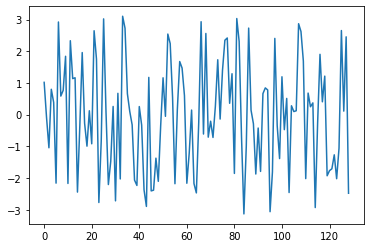

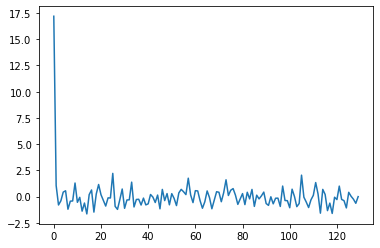

In [ ]:
ss = math.pi - 2 * math.pi * np.random.random(129)
freq = np.fft.rfft(ss)
plt.plot(ss)
plt.show()
t3 = np.fft.rfft(ss)
PhaseX = React2Polar(freq.real, freq.imag)
MgX = np.sqrt(freq.real**2 + freq.imag**2)
ss=myIDFT(MgX, PhaseX)
plt.plot(ss)
plt.show()

(iii)

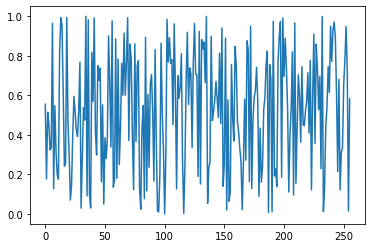

In [ ]:
s=np.zeros(256)
for i in range(0,256):
    s[i]=np.random.random(size=1)
plt.plot(s)

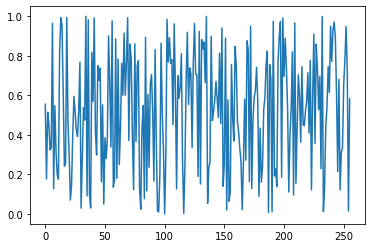

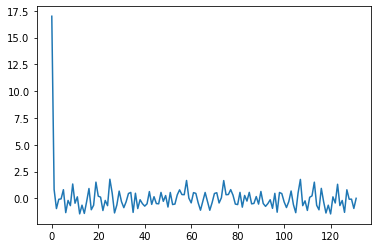

In [ ]:
freq = np.fft.rfft(s)
plt.plot(s)
plt.show()
t3 = np.fft.rfft(ss)
PhaseX = React2Polar(t3.real, t3.imag)
MgX = np.sqrt(t3.real**2 + t3.imag**2)
ss=myIDFT(MgX, PhaseX)
plt.plot(ss)
plt.show()

This is the same as before but instead we have changed the distribution of the signal as stated in the question.